**Tabla de contenido**

- [El proceso de caminata aleatoria](#El-proceso-de-caminata-aleatoria)
    - [Simulando un proceso de paseo aleatorio](#Simulando-un-proceso-de-paseo-aleatorio)
    - [Identificando un paseo aleatorio](#Identificando-un-paseo-aleatorio)
        - [Stationarity](#Stationarity)
        - [Testing for stationarity](#Testing-for-tationarity)
        - [The autocorrelation function](The-autocorrelation-function)
        - [Putting it all together](#Putting-it-all-together)
        - [Is GOOGL a random walk?](#Is-GOOGL-a-random-walk?)
    - [Pronosticando un paseo aleatorio](#Pronosticando-un-paseo-aleatorio)
        - [Pronosticos a largo plazo](#Pronosticos-a-largo-plazo)

En el capítulo anterior, comparamos diferentes métodos de `pronóstico ingenuos` y aprendimos que a menudo `sirven como referencias para modelos más sofisticados`. Sin embargo, `hay instancias en las que los métodos más simples ofrecerán los mejores pronósticos`. Este es el caso cuando nos enfrentamos a un proceso de caminata aleatoria.

En este capítulo, aprenderás `qué es un proceso de paseo aleatorio`, `cómo reconocerlo` y `cómo hacer previsiones utilizando modelos de paseo aleatorio`. A lo largo del camino, observaremos los conceptos de diferenciación, estacionariedad y ruido blanco, que volverán en capítulos posteriores a medida que desarrollemos modelos de aprendizaje estadístico más avanzados.

Para los ejemplos de este capítulo, supongamos que deseas comprar acciones de Alphabet Inc. (GOOGL). Idealmente, querrías comprar si se espera que el precio de cierre de la acción suba en el futuro; de lo contrario, tu inversión no será rentable.
Por lo tanto, `decides recopilar datos sobre el precio de cierre diario de GOOGL durante 1 año y utilizar pronósticos de series temporales para determinar el futuro precio de cierre de la acción`. El precio de cierre de GOOGL desde el 27 de abril de 2020 hasta el 27 de abril de 2021 se muestra en la figura 3.1. En el momento de escribir, los datos más allá del 27 de abril de 2021 aún no estaban disponibles.

![Alpabet](fig/Alphabet.png)

`Resulta que el precio de cierre diario de GOOGL se puede modelar utilizando el modelo de paseo aleatorio`. Para ello, `primero determinaremos si nuestro proceso es estacionario o no`. Si es un proceso no estacionario, tendremos que aplicar transformaciones, como la diferenciación, para hacerlo estacionario. `Entonces podremos usar el gráfico de la función de autocorrelación` para concluir que el precio de cierre diario de GOOGL puede ser aproximado por el modelo de paseo aleatorio. 

# El proceso de caminata aleatoria

`Un paseo aleatorio es un proceso en el cual hay una posibilidad igual de subir o bajar por un número aleatorio`. Esto se observa generalmente en datos financieros y económicos, como el precio de cierre diario de GOOGL. Los paseos aleatorios a menudo exponen largos períodos en los que se puede observar una tendencia positiva o negativa. También suelen ir acompañados de cambios repentinos de dirección.

En un proceso de caminata aleatoria, decimos que el valor presente $y_t$ `es una función del valor en el paso de tiempo anterior` $y_{t-1}$, una constante C y un número aleatorio $ϵ_t$, también denominado ruido blanco. Aquí, $ϵ_t$ es la `realización de la distribución normal estándar, que tiene una varianza de 1 y una media de 0`.

Por lo tanto, `podemos expresar matemáticamente un paseo aleatorio con la siguiente ecuación`, donde $y_t$ `es el valor en el tiempo actual` t, C es una constante, $y_{t–1}$ es el valor en el paso de tiempo anterior t–1, y $ϵ_t$ es un número aleatorio.
$$y_t = C + y_{t–1} + ϵ_t$$

`Tenga en cuenta que si la constante C es diferente de cero, designamos este proceso como un paseo aleatorio con deriva`.


## Simulando un proceso de paseo aleatorio

`Para ayudarte a entender el proceso de caminata aleatoria, vamos a simular uno con Python`; de esa manera podrás comprender cómo se comporta una caminata aleatoria y `podremos estudiar sus propiedades en un escenario puramente teórico`. Luego trasladaremos nuestro conocimiento a nuestro ejemplo de la vida real, donde modelaremos y pronosticaremos el precio de cierre de GOOGL.

A partir de la anterior ecuación sabemos que `un paseo aleatorio depende de su valor anterior` $y_{t–1}$ más `ruido blanco` $ϵ_t$ y `una constante` C. `Para simplificar nuestra simulación, supongamos que la constante` C es 0. De esa manera, nuestro paseo aleatorio simulado se puede expresar como $$y_t = y_{t-1} + ϵ_t$$


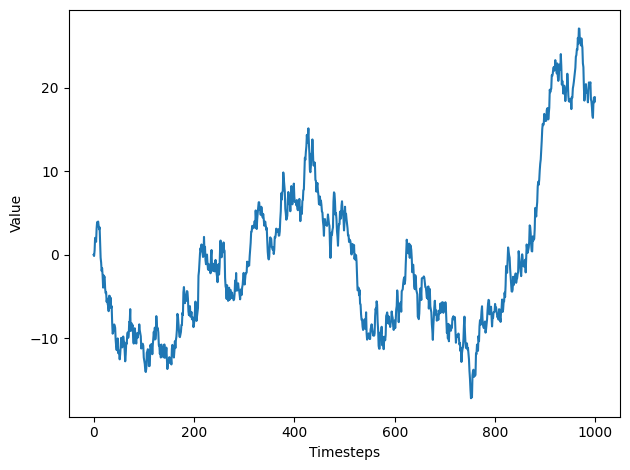

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # establece una semilla
steps = np.random.standard_normal(1000) # Generar 1,000 números aleatorios de una distribución normal con una media de 0 y una varianza de 1.
steps[0]=0 # Inicializa el primer valor de la serie a 0.
random_walk = np.cumsum(steps) # calculará la suma acumulativa del ruido blanco

fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

Puedes ver las características definitorias de un paseo aleatorio en la figura anterior. Notarás una tendencia positiva durante los primeros 400 pasos de tiempo, seguida de una tendencia negativa y un aumento abrupto hacia el final. Por lo tanto, tenemos tanto cambios repentinos como largos períodos en los que se observa una tendencia.

## Identificando un paseo aleatorio

`Para determinar si nuestra serie temporal puede ser aproximada como un paseo aleatorio o no`, primero debemos definir un paseo aleatorio. En el contexto de series temporales, `un paseo aleatorio se define como una serie cuya primera diferencia es estacionaria y no correlacionada`. Esto significa que el proceso se mueve completamente al azar.

`Pasos a seguir para identificar si los datos de series temporales se pueden aproximar a una caminata aleatoria o no`.
- El primer paso es, naturalmente, recopilar los datos. 
- Luego, probamos la estacionariedad. Si no es estacionaria, aplicamos transformaciones hasta que se logre la estacionariedad.
- Después, podemos trazar la función de autocorrelación (FAC). Si no hay autocorrelación, tenemos una caminata aleatoria.

### Stationarity

`Una serie temporal estacionaria es aquella cuyos propiedades estadísticas no cambian a lo largo del tiempo. En otras palabras, tiene una media, varianza y autocorrelación constantes, y estas propiedades son independientes del tiempo.`

Muchos modelos de pronóstico asumen la estacionaridad. El modelo de media móvil (capítulo 4), el modelo autorregresivo (capítulo 5) y el modelo autorregresivo de media móvil (capítulo 6) asumen todos la estacionaridad. Estos modelos solo se pueden usar si verificamos que los datos son efectivamente estacionarios.

De lo contrario, los modelos no serán válidos y las previsiones no serán confiables. Intuitivamente, esto tiene sentido, porque `si los datos son no estacionarios, sus propiedades van a cambiar con el tiempo`, lo que significaría que nuestros parámetros del modelo también deben cambiar con el tiempo. `Esto significa que no podemos derivar una función de valores futuros como una función de valores pasados`, ya que los coeficientes cambian en cada momento, haciendo que la previsión sea poco fiable.

`Podemos ver la estacionaridad como una suposición que puede facilitar nuestras vidas al hacer pronósticos`. Por supuesto, rara vez veremos una serie temporal estacionaria en su estado original porque a menudo estamos interesados en pronosticar procesos con tendencia o con ciclos estacionales. Es en este momento cuando modelos como ARIMA (capítulo 7) y SARIMA (capítulo 8) entran en juego.

`Por ahora, dado que todavía estamos en las primeras etapas de la predicción de series temporales`, `nos centraremos en series temporales estacionarias`, lo que significa que necesitaremos encontrar formas de transformar nuestras series temporales para hacerlas estacionarias. `Una transformación es simplemente una manipulación matemática de los datos que estabiliza su media y varianza, haciendo que así sea estacionaria.`

`La transformación más simple que se puede aplicar es la diferenciación`. Esta transformación ayuda a `estabilizar la media`, lo que a su vez `elimina o reduce los efectos de tendencia y estacionalidad`. La diferenciación implica calcular la serie de cambios de un momento a otro. Para lograrlo, simplemente restamos el valor del momento anterior $y_{t–1}$ del valor en el presente $y_t$ para obtener el valor diferenciado $y't$. $$y't = y_t – y_{t–1}$$

`Nota`: `La diferenciación es una transformación que calcula el cambio de un instante de tiempo a otro. Esta transformación es útil para estabilizar la media. Aplicar una función logarítmica a la serie puede estabilizar su varianza.`

Es posible diferenciar una serie temporal muchas veces. Tomar la diferencia una vez es aplicar una diferenciación de primer orden. Tomarla una segunda vez sería una diferenciación de segundo orden. A menudo no es necesario diferenciar más de dos veces para obtener una serie estacionaria.

`Mientras que la diferenciación se utiliza para obtener una media constante a lo largo del tiempo`, también debemos asegurarnos de que tengamos una varianza constante para que nuestro proceso sea estacionario. `Se utilizan logaritmos para ayudar a estabilizar la varianza`.

Ten en cuenta que `cuando modelamos una serie temporal que ha sido transformada`, `debemos destransformarla para devolver los resultados del modelo a las unidades de medida originales`.

Ahora que sabemos qué tipo de transformaciones necesitamos aplicar a una serie de tiempo para hacerla estacionaria, debemos encontrar una manera de probar si una serie es estacionaria o no.

### Testing for stationarity

Una vez que se aplica una transformación a una serie temporal, necesitamos probar la estacionariedad para determinar si necesitamos aplicar otra transformación para hacer que la serie temporal sea estacionaria, o si necesitamos transformarla en absoluto. `Una prueba común es la prueba de Dickey-Fuller aumentada (ADF)`.

La prueba ADF verifica la siguiente hipótesis nula: 

- `hay una raíz unitaria presente en una serie temporal.` 
- `La hipótesis alternativa es que no hay raíz unitaria y, por lo tanto, la serie temporal es estacionaria`.

El resultado de esta prueba es la estadística ADF, que es un número negativo. Cuanto más negativo sea, más fuerte es el rechazo de la hipótesis nula. En su implementación `en Python, también se devuelve el valor p.` Si `su valor es menor que 0.05`, también podemos rechazar la hipótesis nula y decir que la serie es estacionaria.

Consideremos una serie temporal muy simple donde el valor presente $y_t$ depende únicamente de su valor pasado $y_{t–1} sujeto a un coeficiente $α_1$, una constante $C$ y ruido blanco $ϵ_t$. Podemos escribir la siguiente expresión general: $$y_t = C + α_1 * y_{t–1} + ϵ_t$$
Aquí, $α_1$ es la raíz de la serie temporal.

`Si la prueba devuelve un valor p menor que un cierto nivel de significancia, típicamente 0.05 o 0.01,` entonces podemos rechazar la hipótesis nula, lo que significa que no hay raíces unitarias, y por lo tanto, la serie es estacionaria.

`Una vez que tenemos una serie estacionaria`, `debemos determinar si hay autocorrelación o no`. `Recuerda que un paseo aleatorio es una serie cuya primera diferencia es estacionaria y no correlacionada`. La prueba ADF se encarga de la parte de estacionariedad, pero necesitaremos usar la función de autocorrelación para determinar si la serie está correlacionada o no.


### The autocorrelation function

`Una vez que un proceso es estacionario`, `trazar la función de autocorrelación (ACF) es una excelente manera de entender qué tipo de proceso estás analizando`. En este caso, la utilizaremos para determinar si estamos estudiando una caminata aleatoria o no.

Sabemos que la correlación mide el grado de una relación lineal entre dos variables. La autocorrelación, por lo tanto, mide la relación lineal entre los valores rezagados de una serie temporal. Así, `la ACF revela cómo cambia la correlación entre dos valores a medida que aumenta el rezago`. Aquí, el rezago es simplemente el número de pasos de tiempo que separan dos valores.

`En otras palabras, mide la correlación de la serie temporal consigo misma.` Por ejemplo, podemos calcular el coeficiente de autocorrelación entre $yt$ y $y_{t–1}$. En este caso, el `rezago es igual a 1`, y el `coeficiente se denotaría como` $r_1$. De manera similar, podemos calcular la autocorrelación entre $y_t$ y $y_{t–2}$. Entonces el rezago sería 2, y el coeficiente se denotaría como r2. Cuando graficamos la función ACF, el coeficiente es la variable dependiente, mientras que el rezago es la variable independiente.

Tenga en cuenta que el coeficiente de autocorrelación en el rezago 0 siempre será igual a 1. Esto tiene sentido intuitivamente, porque la relación lineal entre una variable y sí misma en el mismo instante de tiempo debe ser perfecta y, por lo tanto, igual a 1.

`En presencia de una tendencia`, `un gráfico de la ACF mostrará que los coeficientes son altos para lags cortos y disminuirán linealmente a medida que aumenta el lag`. `Si los datos son estacionales, el gráfico de la ACF también mostrará patrones cíclicos`. Por lo tanto, trazar la función de la ACF de un proceso no estacionario no nos dará más información que la disponible al observar la evolución de nuestro proceso a lo largo del tiempo. Sin embargo, trazar la ACF para un proceso estacionario puede ayudarnos a identificar la presencia de un paseo aleatorio.



### Putting it all together

Ahora que entiendes qué es la estacionariedad, cómo transformar una serie de tiempo para que sea estacionaria, qué prueba estadística se puede utilizar para evaluar la estacionariedad y cómo graficar la función ACF puede ayudarte a identificar la presencia de un paseo aleatorio, podemos reunir todos estos conceptos y aplicarlos en Python. En esta sección, trabajaremos con nuestros datos simulados y `cubriremos los pasos necesarios para identificar un paseo aleatorio.`

In [3]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


El estadístico ADF no es un número negativo grande, y con un valor p mayor que 0.05, no podemos rechazar la hipótesis nula que establece que nuestro serie de timpo no es estacionaria, es decir, en este caso la serie de tiempo `no es estacionaria`. Podemos respaldar aún más nuestra conclusión trazando la función ACF.

La biblioteca statsmodels tiene convenientemente una función para trazar rápidamente la ACF. Nuevamente, simplemente podemos pasarle nuestro array de datos. Opcionalmente, podemos especificar el número de rezagos, que determinará el rango en el eje x. En este caso, trazaremos los primeros 20 rezagos, pero `siéntete libre de trazar tantos rezagos como desees`.

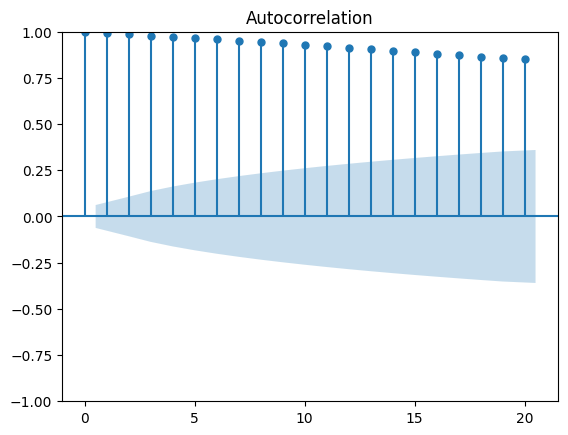

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(random_walk, lags=20);

Gráfica de la ACF de nuestro paseo aleatorio simulado. `Observa cómo los coeficientes de autocorrelación disminuyen lentamente`. `Incluso en el retraso 20, el valor sigue siendo autocorrelacionado, lo que significa que nuestro paseo aleatorio no es estacionario en este momento`.

En la `figura notarás cómo los coeficientes de autocorrelación disminuyen lentamente a medida que aumenta el rezago`, `lo que es un claro indicador de que nuestra caminata aleatoria no es un proceso estacionario`. Ten en cuenta que el área sombreada representa un intervalo de confianza. Si un punto está dentro del área sombreada, entonces no es significativamente diferente de 0. De lo contrario, el coeficiente de autocorrelación es significativo.

`Debido a que nuestro paseo aleatorio no es estacionario`, `necesitamos aplicar una transformación para hacerlo estacionario` y `así poder recuperar información útil del gráfico ACF`. Dado que nuestra secuencia muestra principalmente cambios en la tendencia sin patrones estacionales, aplicaremos una diferenciación de primer orden. Recuerda que perderemos el primer punto de datos cada vez que hagamos la diferenciación.

Para la diferenciación, utilizaremos el método diff de numpy. Esto diferenciará un array de datos dado. El parámetro n controla cuántas veces se debe diferenciar el array. Para aplicar una diferenciación de primer orden, el parámetro n debe establecerse en 1:

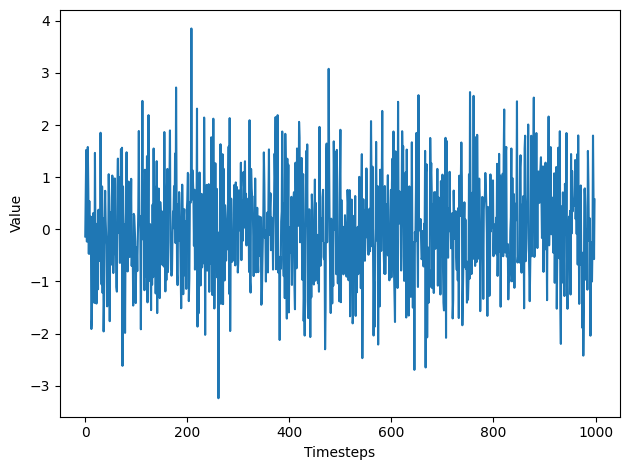

In [7]:
diff_random_walk = np.diff(random_walk, n=1)
fig, ax = plt.subplots()
ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

Como se puede ver en la figura, hemos eliminado la tendencia de nuestra serie. Además, la varianza parece bastante estable. Probemos la estacionaridad nuevamente, utilizando la prueba ADF:

In [8]:
ADF_result = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


`Esto imprime un estadístico ADF de -31.79 con un valor p de 0`. `Esta vez el estadístico ADF es un número negativo grande, y el valor p es menor que 0.05`. Por lo tanto, rechazamos la hipótesis nula, y podemos decir que este proceso no tiene raíz unitaria y es, por lo tanto, `estacionario`. Veamos el gráfico de autocorrelación.

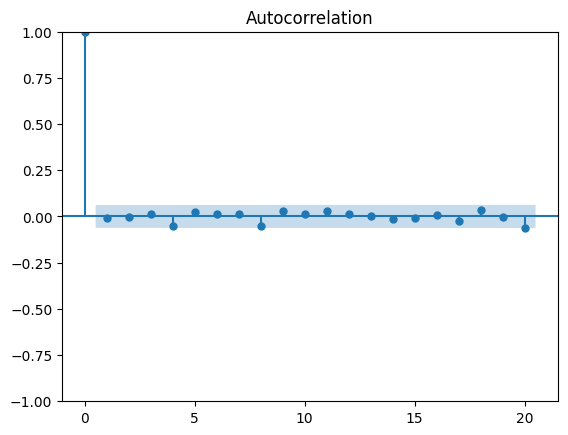

In [9]:
plot_acf(diff_random_walk, lags=20);

`Al observar la figura, notarás que no hay coeficientes de autocorrelación significativos después del rezago 0`. `Esto significa que el proceso estacionario es completamente aleatorio` y, por lo tanto, puede describirse como `ruido blanco`. Cada valor es simplemente un paso aleatorio desde el anterior, sin relación entre ellos.

`Hemos demostrado que nuestros datos simulados son de hecho un paseo aleatorio: la serie es estacionaria y no correlacionada después de una diferenciación de primer orden, lo que corresponde a la definición de un paseo aleatorio.`


### Is GOOGL a random walk?

`Hemos aplicado los pasos necesarios para identificar un paseo aleatorio en nuestros datos simulados`, así que este es un gran momento para poner a prueba nuestro conocimiento y nuevas habilidades en un conjunto de datos del mundo real. Tomando el precio de cierre de GOOGL del 27 de abril de 2020 al 27 de abril de 2021, de finance.yahoo.com, determinemos si el proceso puede aproximarse a un paseo aleatorio o no.

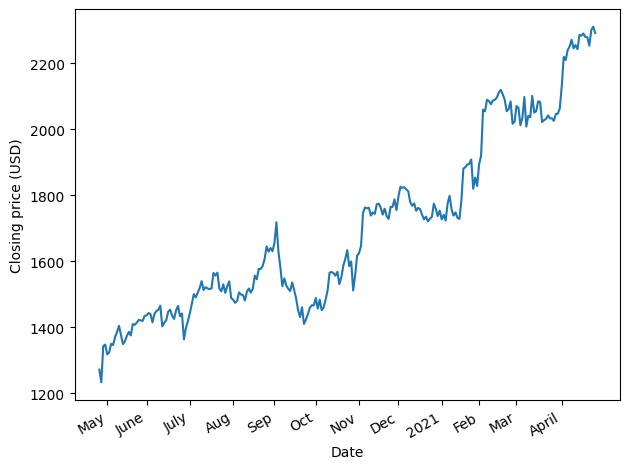

In [10]:
import os
import pandas as pd
path_file = lambda x: os.path.join(os.getcwd(),'data', x)
df = pd.read_csv(path_file('GOOGL.csv'))

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
plt.xticks(
[4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 2021, 'Feb',
'Mar', 'April'])
fig.autofmt_xdate()
plt.tight_layout()

Mirando la figura, podemos ver una tendencia en los datos ya que el precio de cierre está aumentando con el tiempo; por lo tanto, `no tenemos un proceso estacionario`. Esto se apoya aún más en la prueba ADF:

In [11]:
GOOGL_ADF_result = adfuller(df['Close'])
print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771302
p-value: 0.9699419435913057


Esto devuelve una estadística ADF de 0.16 y un valor p mayor que 0.05, por lo que sabemos que nuestros datos no son estacionarios. Por lo tanto, diferenciamos nuestros datos para ver si eso los hace estacionarios:

In [12]:
diff_close = np.diff(df['Close'], n=1) # calcula primera diferenciacion
GOOGL_diff_ADF_result = adfuller(diff_close)
print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295234
p-value: 5.3865309614545585e-06


Esto da una estadística ADF de -5.3 y un valor p menor que 0.05, `lo que significa que tenemos un proceso estacionario`. Ahora podemos trazar la función ACF y ver si hay autocorrelación:

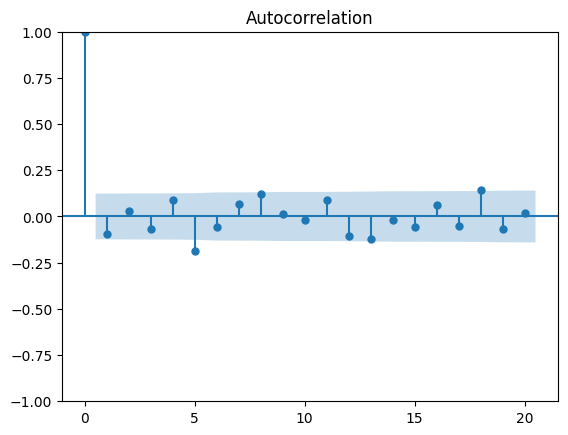

In [13]:
plot_acf(diff_close, lags=20);

`La Figura  podría hacerte rascarte la cabeza y preguntarte si hay autocorrelación o no`. No vemos coeficientes significativos, excepto en los rezagos 5 y 18. `Esta situación puede surgir a veces`, y `se debe únicamente al azar`. `En tal situación, podemos asumir con seguridad que los coeficientes en los rezagos 5 y 18 no son significativos`, `porque no tenemos coeficientes significativos consecutivos`. Simplemente ocurrió por azar que los valores diferenciados están ligeramente correlacionados con los de los rezagos 5 y 18.

Por lo tanto, podemos concluir que el precio de cierre de GOOGL puede ser aproximado por un proceso de caminata aleatoria. Tomar la primera diferencia hace que la serie sea estacionaria, y su gráfico de ACF muestra que no hay autocorrelación, `lo que significa que es puramente aleatorio`.

## Pronosticando un paseo aleatorio

Ahora que sabemos qué es un paseo aleatorio y cómo identificar uno, podemos empezar a hacer pronósticos. Esto puede sonar sorprendente, ya que establecimos que un paseo aleatorio da pasos aleatorios a medida que avanza el tiempo.

En este caso, solo podemos utilizar métodos de pronóstico ingenuos, o líneas base, que cubrimos en el capítulo 2. Dado que los valores cambian aleatoriamente, `no se puede aplicar ningún modelo de aprendizaje estadístico`. En cambio, `solo podemos predecir razonablemente la media histórica`, o el último valor.

Dependiendo del caso de uso, su horizonte de pronóstico variará. Idealmente, al tratar con un paseo aleatorio, solo pronosticará el siguiente intervalo de tiempo. Sin embargo, es posible que se le pida pronosticar muchos intervalos de tiempo en el futuro. Vamos a ver cómo abordar cada una de estas situaciones.

### Pronosticos a largo plazo

En esta sección, `pronosticaremos un paseo aleatorio en un horizonte largo`. `Este no es un caso ideal`: un paseo aleatorio puede aumentar o disminuir inesperadamente porque las observaciones pasadas no son predictivas de cambios en el futuro.

Para facilitar las cosas, asignaremos el paseo aleatorio a un DataFrame y dividiremos el conjunto de datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento contendrá los primeros 800 pasos de tiempo, que corresponden al 80% de los datos simulados. Por lo tanto, el conjunto de prueba contendrá los últimos 200 valores: 

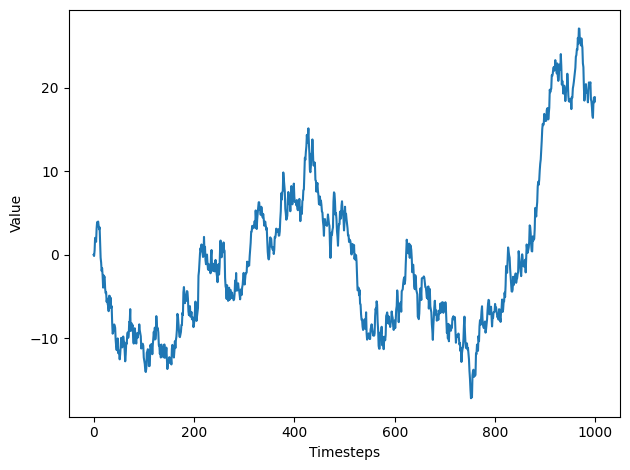

In [16]:
df = pd.DataFrame({'value': random_walk})
train = df[:800]
test = df[800:]
fig, ax = plt.subplots()
ax.plot(df)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()